In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from src.definitions import ROOT_DIR

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
plt.style.use('seaborn-poster')

# Load train data

In [4]:
train_path = ROOT_DIR / 'data/external' / 'CSV_train.csv'

assert train_path.is_file()

In [5]:
data = pd.read_csv(train_path, sep=';')

In [6]:
data.sample(10)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
538689,30/6-5,3440.106400,497433.34375,6728315.0,-3414.984619,DUNLIN GP.,Statfjord Fm.,14.804700,8.733324,7.239561,...,NaN,NaN,NaN,0.007536,NaN,NaN,NaN,8.379743,30000,1.0
14271,15/9-13,2664.328000,437613.84375,6470982.0,-2638.911377,SHETLAND GP.,Svarte Fm.,9.765600,NaN,6.159259,...,3.832453,NaN,NaN,-0.011604,0.144990,NaN,NaN,NaN,80000,1.0
465627,26/4-1,3352.136200,501139.78125,6608169.0,-3328.319092,DUNLIN GP.,Statfjord Fm.,9.093750,3.640818,20.152365,...,10.324669,NaN,0.593750,-0.006556,0.137800,NaN,NaN,NaN,65000,1.0
106593,16/11-1 ST3,2060.945201,NaN,NaN,NaN,CROMER KNOLL GP.,Aasgard Fm.,13.882640,1.064114,NaN,...,14.450583,NaN,NaN,0.019559,1.389986,NaN,NaN,NaN,80000,1.0
232187,25/2-13 T4,1613.648000,469382.31250,6628720.0,-1590.159546,HORDALAND GP.,Utsira Fm.,18.020247,0.953829,0.766408,...,NaN,NaN,0.520247,0.081660,NaN,NaN,NaN,NaN,65000,2.0
238829,25/2-13 T4,2623.232000,469381.37500,6628712.0,-2598.883545,ROGALAND GP.,Ty Fm.,13.730216,1.201560,1.182236,...,NaN,NaN,1.480215,0.064265,NaN,NaN,NaN,NaN,65000,1.0
250728,25/2-14,1734.585901,476919.78125,6625427.5,-1711.881714,HORDALAND GP.,Grid Fm.,14.997523,0.782215,0.666780,...,NaN,NaN,2.747522,0.059727,NaN,NaN,NaN,NaN,65000,1.0
739183,33/9-17,1620.937985,438467.71875,6814171.5,-1594.623169,HORDALAND GP.,Utsira Fm.,12.382620,0.533577,0.498149,...,NaN,NaN,NaN,-0.022000,NaN,NaN,41.558792,NaN,65000,1.0
446731,25/9-1,2309.990000,483525.65625,6590324.5,-2284.713379,DUNLIN GP.,Statfjord Fm.,8.667951,1.034810,1.224703,...,12.677684,NaN,NaN,0.078237,0.152180,1.446453,NaN,1.062475,65000,1.0
31425,15/9-15,2495.608000,436805.90625,6463012.0,-2470.299805,SHETLAND GP.,Tor Fm.,12.528812,3.714116,3.714116,...,11.447932,NaN,4.028811,-0.030260,0.144990,NaN,NaN,5.855594,70032,1.0


In [7]:
data.shape

(1170511, 29)

## Raw features

In [8]:
data.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

## Wells

In [9]:
wells = len(data['WELL'].unique())

print(f'The number of wells is: {wells}')

The number of wells is: 98


## Target lithology

In [10]:
lithology_keys = {30000: 'Sandstone',
                  65030: 'Sandstone/Shale',
                  65000: 'Shale',
                  80000: 'Marl',
                  74000: 'Dolomite',
                  70000: 'Limestone',
                  70032: 'Chalk',
                  88000: 'Halite',
                  86000: 'Anhydrite',
                  99000: 'Tuff',
                  90000: 'Coal',
                  93000: 'Basement'}

In [11]:
data['FORCE_2020_LITHOFACIES_LITHOLOGY'].replace(lithology_keys, inplace=True)

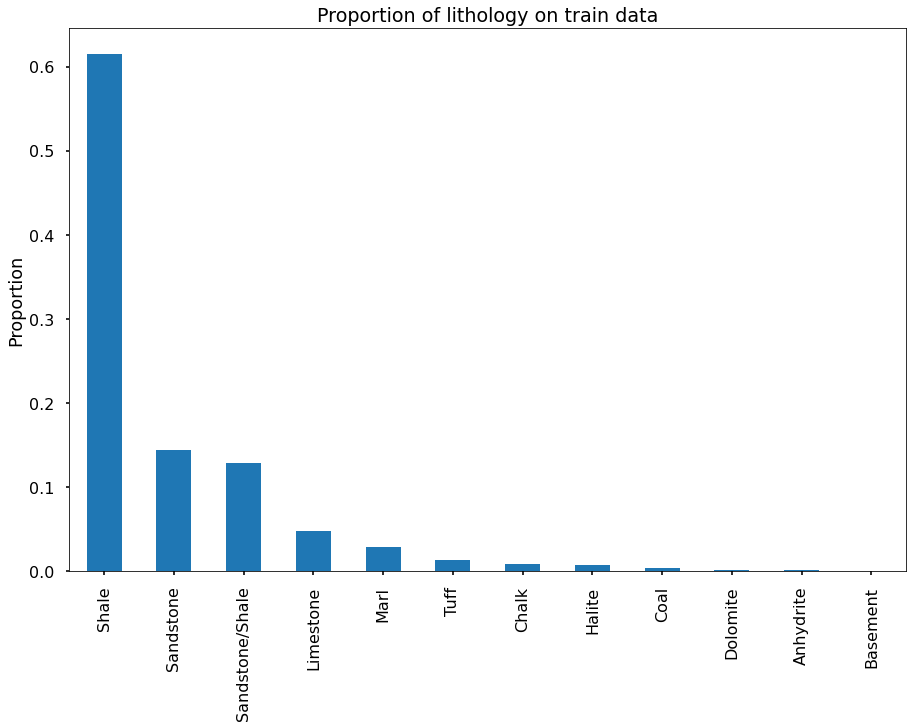

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

data['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts(normalize=True).plot(kind='bar', ax=ax)

plt.title('Proportion of lithology on train data')
plt.ylabel('Proportion')

plt.show()

# Lithofacies colors

In [13]:
# https://github.com/equinor/force-ml-2020-wells/blob/master/1%20-%20data_visualization/COSMETICS_DICTIONARIES.ipynb

# litho dictionary: name: hex-color
litho_dict = {'Sandstone'      : '#FFFF00',
              'Shale'          : '#825000',
              'Sandstone/Shale': '#FF7800',
              'Limestone'      : '#00BEFF',
              'Chalk'          : '#00FFFF',
              'Dolomite'       : '#783CA0',
              'Marl'           : '#006400',
              'Anhydrite'      : '#C878C8',
              'Halite'         : '#FFDCFF',
              'Coal'           : '#000000',
              'Basement'       : '#FF00FF',
              'Tuff'           : '#32EBB9'
             }

# Distributions

## GR
Let's see if we can separate the lithologies only using GR.

In [14]:
missing_gr = data['GR'].isnull().sum()

print(f'There are {missing_gr} missing GR values')

There are 0 missing GR values


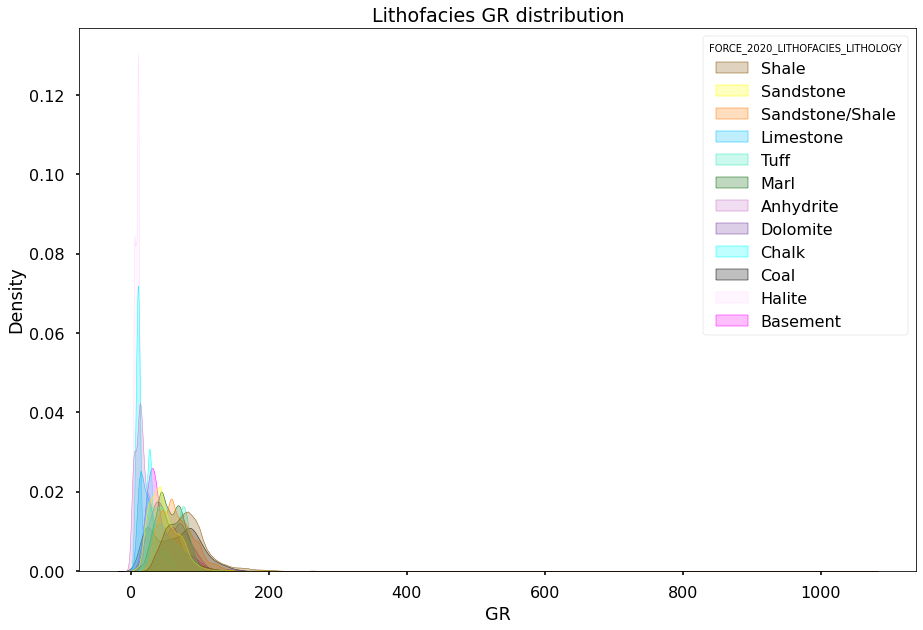

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

sns.kdeplot(data=data,
            x='GR',
            hue='FORCE_2020_LITHOFACIES_LITHOLOGY',
            common_norm=False,
            palette=litho_dict,
            fill=True,
            ax=ax)

plt.title('Lithofacies GR distribution')

plt.show()

It seems there are GR outlier (>250 API) that are biasing the plot. Let's zoom in the plot.

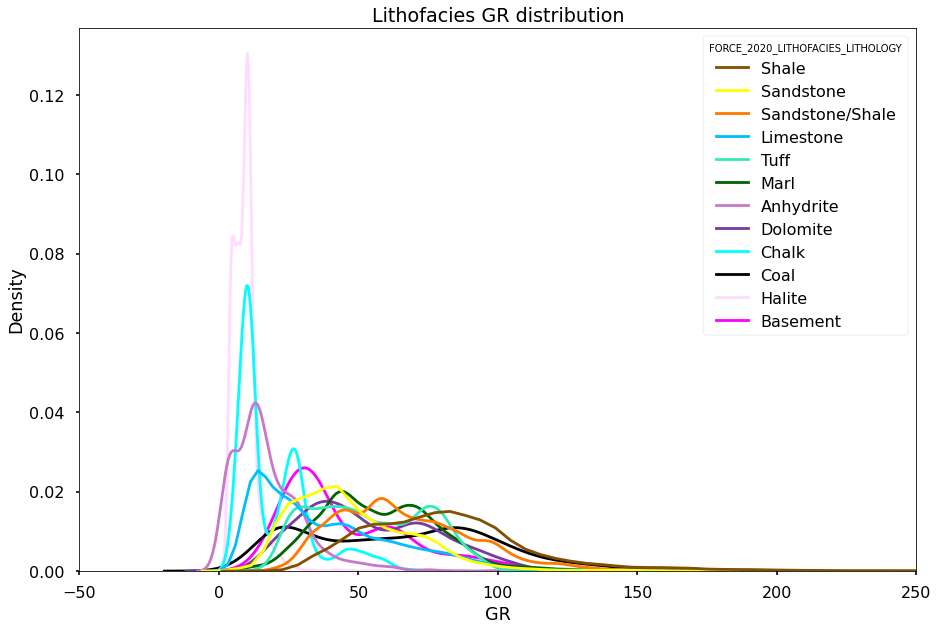

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

sns.kdeplot(data=data,
            x='GR',
            hue='FORCE_2020_LITHOFACIES_LITHOLOGY',
            common_norm=False,
            palette=litho_dict,
            ax=ax)

plt.xlim((-50, 250))

plt.title('Lithofacies GR distribution')

plt.show()

There are some nice separations on the low GR values (halite, chalk, anhydrate) but also there is considerable overlap in the rest of the distributions. Let's add one more variable in combination with GR.

## RHOB

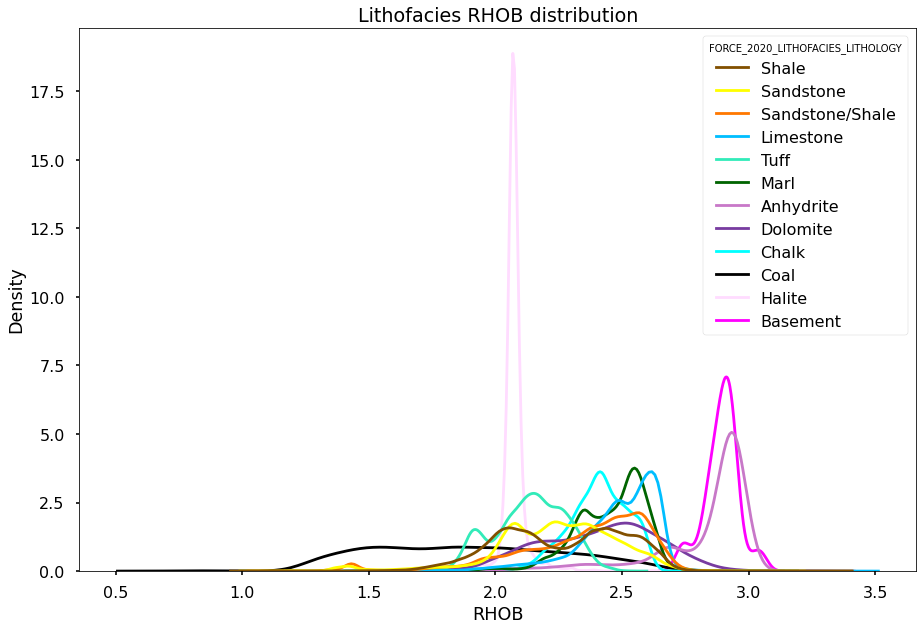

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

sns.kdeplot(data=data,
            x='RHOB',
            hue='FORCE_2020_LITHOFACIES_LITHOLOGY',
            common_norm=False,
            palette=litho_dict,
            ax=ax)

plt.title('Lithofacies RHOB distribution')

plt.show()

In this case, the basement and anhydrite breakout from the rest on the RHOB high side. Also, the coal dominates the low end of the density (<1.6 gr/cc).

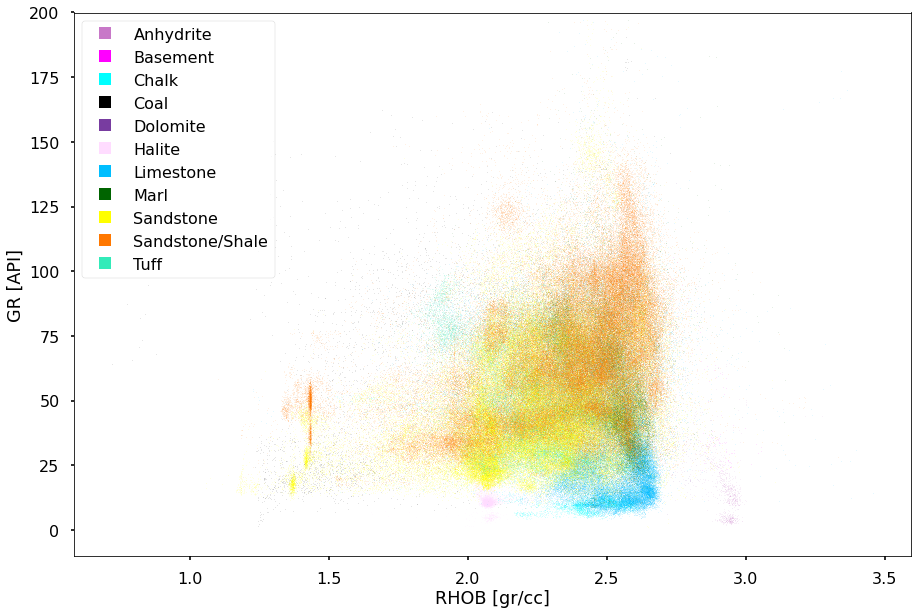

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))


for lith, group in data.groupby('FORCE_2020_LITHOFACIES_LITHOLOGY'):
    
    if lith == 'Shale':
        continue
    
    color = litho_dict[lith]

    plt.plot(group['RHOB'],
             group['GR'],
             linestyle='None',
             mec='None',
             marker=',',
             color=color,
             alpha=0.1,
             label=lith)

plt.ylim((-10, 200))

legend = plt.legend()

for l in legend.get_lines():
    l._legmarker.set_marker('s')
    l._legmarker.set_alpha(1)    

plt.ylabel('GR [API]')
plt.xlabel('RHOB [gr/cc]')
    
plt.show()

There is a lot of overlap!